# Spotify Classification Problem
### Question: How is a song’s genre categorized?
Finding what predictors matter the most when classifying what Genre a song belongs to. 

### Importing Data

In [66]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots 
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, 
                                           QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [67]:
spotify = pd.read_csv("spotify_songs.csv") 
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Cleaning Data
Get rid of all null values and duplicated values

In [68]:
spotify.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [69]:
spotify.isnull().sum(), spotify.shape

(track_id                    0
 track_name                  5
 track_artist                5
 track_popularity            0
 track_album_id              0
 track_album_name            5
 track_album_release_date    0
 playlist_name               0
 playlist_id                 0
 playlist_genre              0
 playlist_subgenre           0
 danceability                0
 energy                      0
 key                         0
 loudness                    0
 mode                        0
 speechiness                 0
 acousticness                0
 instrumentalness            0
 liveness                    0
 valence                     0
 tempo                       0
 duration_ms                 0
 dtype: int64,
 (32833, 23))

In [70]:
# Drop na values in the spotify data
spotify = spotify.dropna()
spotify.isnull().sum(), spotify.shape

(track_id                    0
 track_name                  0
 track_artist                0
 track_popularity            0
 track_album_id              0
 track_album_name            0
 track_album_release_date    0
 playlist_name               0
 playlist_id                 0
 playlist_genre              0
 playlist_subgenre           0
 danceability                0
 energy                      0
 key                         0
 loudness                    0
 mode                        0
 speechiness                 0
 acousticness                0
 instrumentalness            0
 liveness                    0
 valence                     0
 tempo                       0
 duration_ms                 0
 dtype: int64,
 (32828, 23))

In [71]:
# Look for any duplicate rows
spotify.duplicated().sum()

0

In [72]:
# Get rid of duplicated values anyways, just in case
spotify = spotify.drop_duplicates()
spotify.duplicated().sum(), spotify.shape

(0, (32828, 23))

### Data Check:
Make sure that all types are standard dtypes

In [73]:
spotify.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [74]:
spotify.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [75]:
spotify.playlist_genre.unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [76]:
fig=px.bar(spotify.playlist_genre.value_counts(),color=['red','blue','green','orange','teal','black'], text_auto=True)
fig.update_layout(width = 800)
fig.show()

In [77]:
# Check to see if all songs have a genre
spotify.playlist_genre.isnull().sum() 

0

In [78]:
spotify.playlist_genre.value_counts().sum() == spotify.shape[0]

True

We don't have any null values in the genre column, so no need to remove anything. When we sum the value counts of playlist_genres we see that it matches the number of rows in the dataset as well, meaning that each song has a genre.

In [79]:
spotify.max()

track_id                                               7zzZmpw8L66ZPjH1M6qmOs
track_name                                                    하드캐리 Hard Carry
track_artist                                                             香取慎吾
track_popularity                                                          100
track_album_id                                         7zygyMUltFYOvHoT3NOTsj
track_album_name            화양연화 The Most Beautiful Moment In Life: Young ...
track_album_release_date                                           2020-01-29
playlist_name                                               🤩🤪Post Teen Pop🤪🤩
playlist_id                                            7xWuNevFBmwnFEg6wzdCc7
playlist_genre                                                           rock
playlist_subgenre                                          urban contemporary
danceability                                                            0.983
energy                                                          

In [80]:
spotify.min()

track_id                                    0017A6SJgTbfQVU2EtsPNo
track_name                  "I TRIED FOR YEARS... NOBODY LISTENED"
track_artist                                                   !!!
track_popularity                                                 0
track_album_id                              000YOrgQoB5IiiH95Yb8vY
track_album_name                                                 !
track_album_release_date                                1957-01-01
playlist_name                                     "Permanent Wave"
playlist_id                                 0275i1VNfBnsNbPl0QIBpG
playlist_genre                                                 edm
playlist_subgenre                                       album rock
danceability                                                   0.0
energy                                                    0.000175
key                                                              0
loudness                                                   -46

/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_21663/1504921585.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



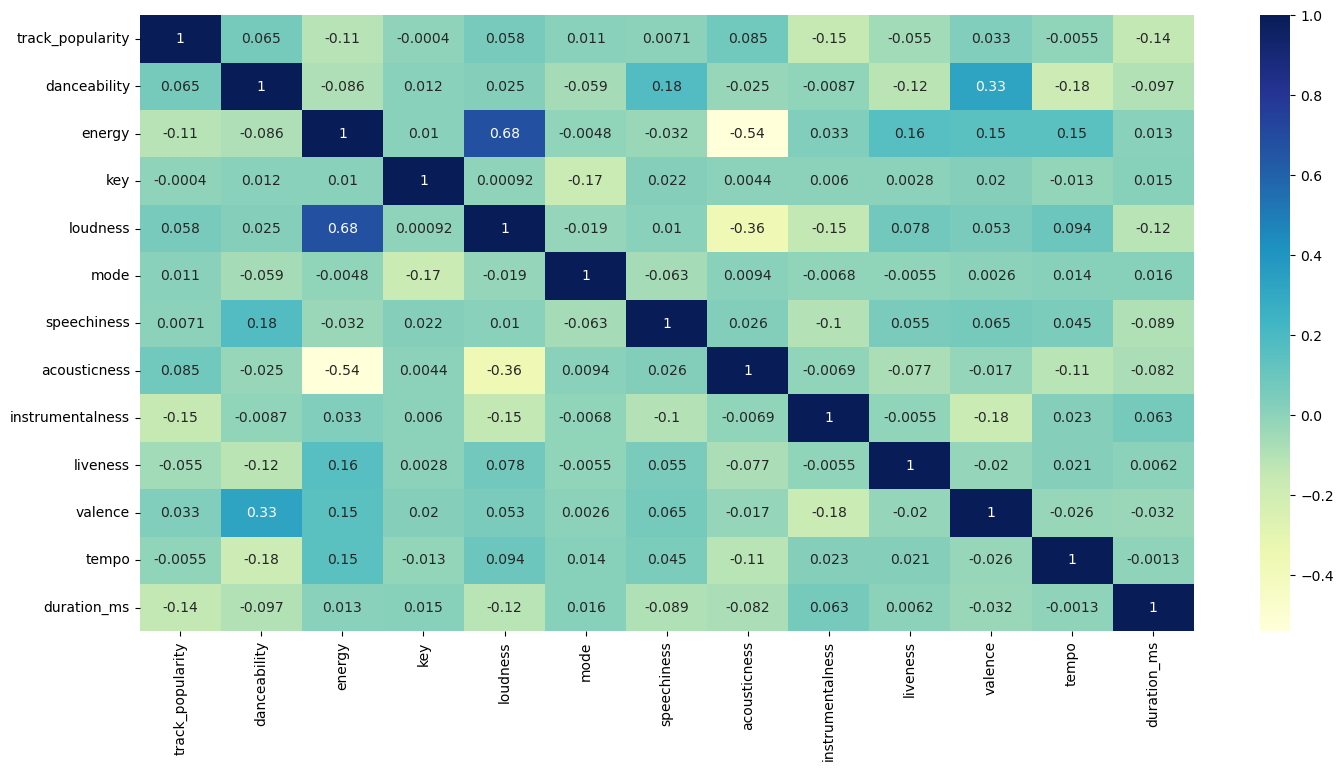

In [85]:
fig,ax= subplots(figsize = (17,8))
sns.heatmap(spotify.corr(numeric_only=True),annot= True, cmap="YlGnBu", ax=ax)
fig.show();

<strong>Data Check Conclusion:</strong> All of the values are within an acceptable range as well. After cleaning the data to ensure we can work with all observations we can begin exploring the data a bit more, and split the data into test and training data.
Loudness is in the negatives for the minimum value, which makes sense as loudness is measured in decibals.

## Training/Test Split
We will use the train_test_split package to split our data set into a training set, and a test set to see how well our model can predict genre based on a set of predictors.

In [99]:
# Make a copy of the spotify dataset to only include colums that are numeric. Include the playlist_genre column as well.
spotify_numeric = spotify[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']].copy()
# Normalize the data
spotify_numeric = StandardScaler().fit_transform(spotify_numeric)
# Convert the normalized data into a dataframe.
spotify_numeric = pd.DataFrame(spotify_numeric, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'])
spotify_numeric['playlist_genre'] = spotify.playlist_genre
spotify_numeric.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_genre
0,0.642015,1.201668,0.173348,1.367040,0.876132,-0.481253,-0.333961,-0.377985,-0.809246,0.031929,0.042833,-0.518802,pop
1,0.490384,0.643388,1.557808,0.585736,0.876132,-0.688547,-0.468726,-0.359210,1.081094,0.782525,-0.777291,-1.056175,pop
2,0.138877,1.284580,-1.211111,1.100025,-1.141381,-0.324301,-0.436856,-0.377881,-0.519571,0.439395,0.116133,-0.821933,pop
3,0.435246,1.279053,0.450240,0.984251,0.876132,-0.049884,-0.667687,-0.377943,0.089589,-1.001750,0.039860,-0.947661,pop
4,-0.033430,0.742884,-1.211111,0.685114,0.876132,-0.702366,-0.432758,-0.377985,-0.692598,0.919777,0.114944,-0.614097,pop


In [100]:
# Split the data into training and testing sets
spotify_train, spotify_test = train_test_split(spotify_numeric, test_size=0.2, random_state=43)
spotify_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_genre
9164,1.021091,0.212242,1.557808,-0.250777,0.876132,1.490015,0.672226,-0.377985,4.522201,-0.113901,-1.038636,0.423430,rap
20299,-0.253984,0.245407,0.173348,1.386447,-1.141381,0.335091,2.192889,-0.377958,-0.305717,0.336456,2.198152,0.792190,latin
32461,0.917707,0.554948,1.557808,0.100559,-1.141381,-0.554299,0.385395,-0.377947,-0.975793,1.691819,0.116579,-1.243772,edm
421,0.586876,-0.766128,-0.380435,0.385977,-1.141381,-0.674727,-0.015259,-0.377985,-0.767771,-1.301988,-0.364292,0.654095,pop
32332,0.552415,1.378548,0.450240,0.407057,0.876132,-0.474343,-0.796812,3.425951,0.640425,1.215726,0.265929,-0.844745,edm
